# Spam classsification

In [46]:
import pandas as pd

In [47]:
import re

In [48]:
from nltk.corpus import stopwords

In [49]:
import numpy as np

In [50]:
data_frame = pd.read_csv("tweets.csv",header=0)

In [51]:
data_frame.head()

,id,tweet,spam
0,1,via @pmpg65: @trafficLARA @PJGZLEZ la locura ...,0
1,2,via @SotoKv: @photojcg al parecer fuegos arti...,0
2,3,via @PJGZLEZ: ellos se comen una torta de mas ...,0
3,4,via @SobrePC: bomba artificiales en el core 3...,0
4,5,via @econ\\_carlos: Muerto no cumple años la v...,0


# Text manipulation

In [52]:
def only_text(text):
    return re.sub("[^a-zA-Z]|via|(http:\/\/\w+.+?\w+\/?\w+?)"," ",text)

In [53]:
def to_lower(text):
    return text.lower()

In [61]:
def remove_stop_words(text):
    return [w for w in text.split() if w not in stopwords.words('spanish')]

In [62]:
data_frame['tweet'] = data_frame['tweet'].apply(only_text)

In [63]:
data_frame['tweet'] = data_frame['tweet'].apply(to_lower)

# Word Count

In [64]:
from collections import Counter

In [65]:
from itertools import chain

In [81]:
count_words = Counter(chain.from_iterable( [remove_stop_words(word) for word in data_frame[data_frame['spam'] == 1]['tweet']] ))

# Word count graphic

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

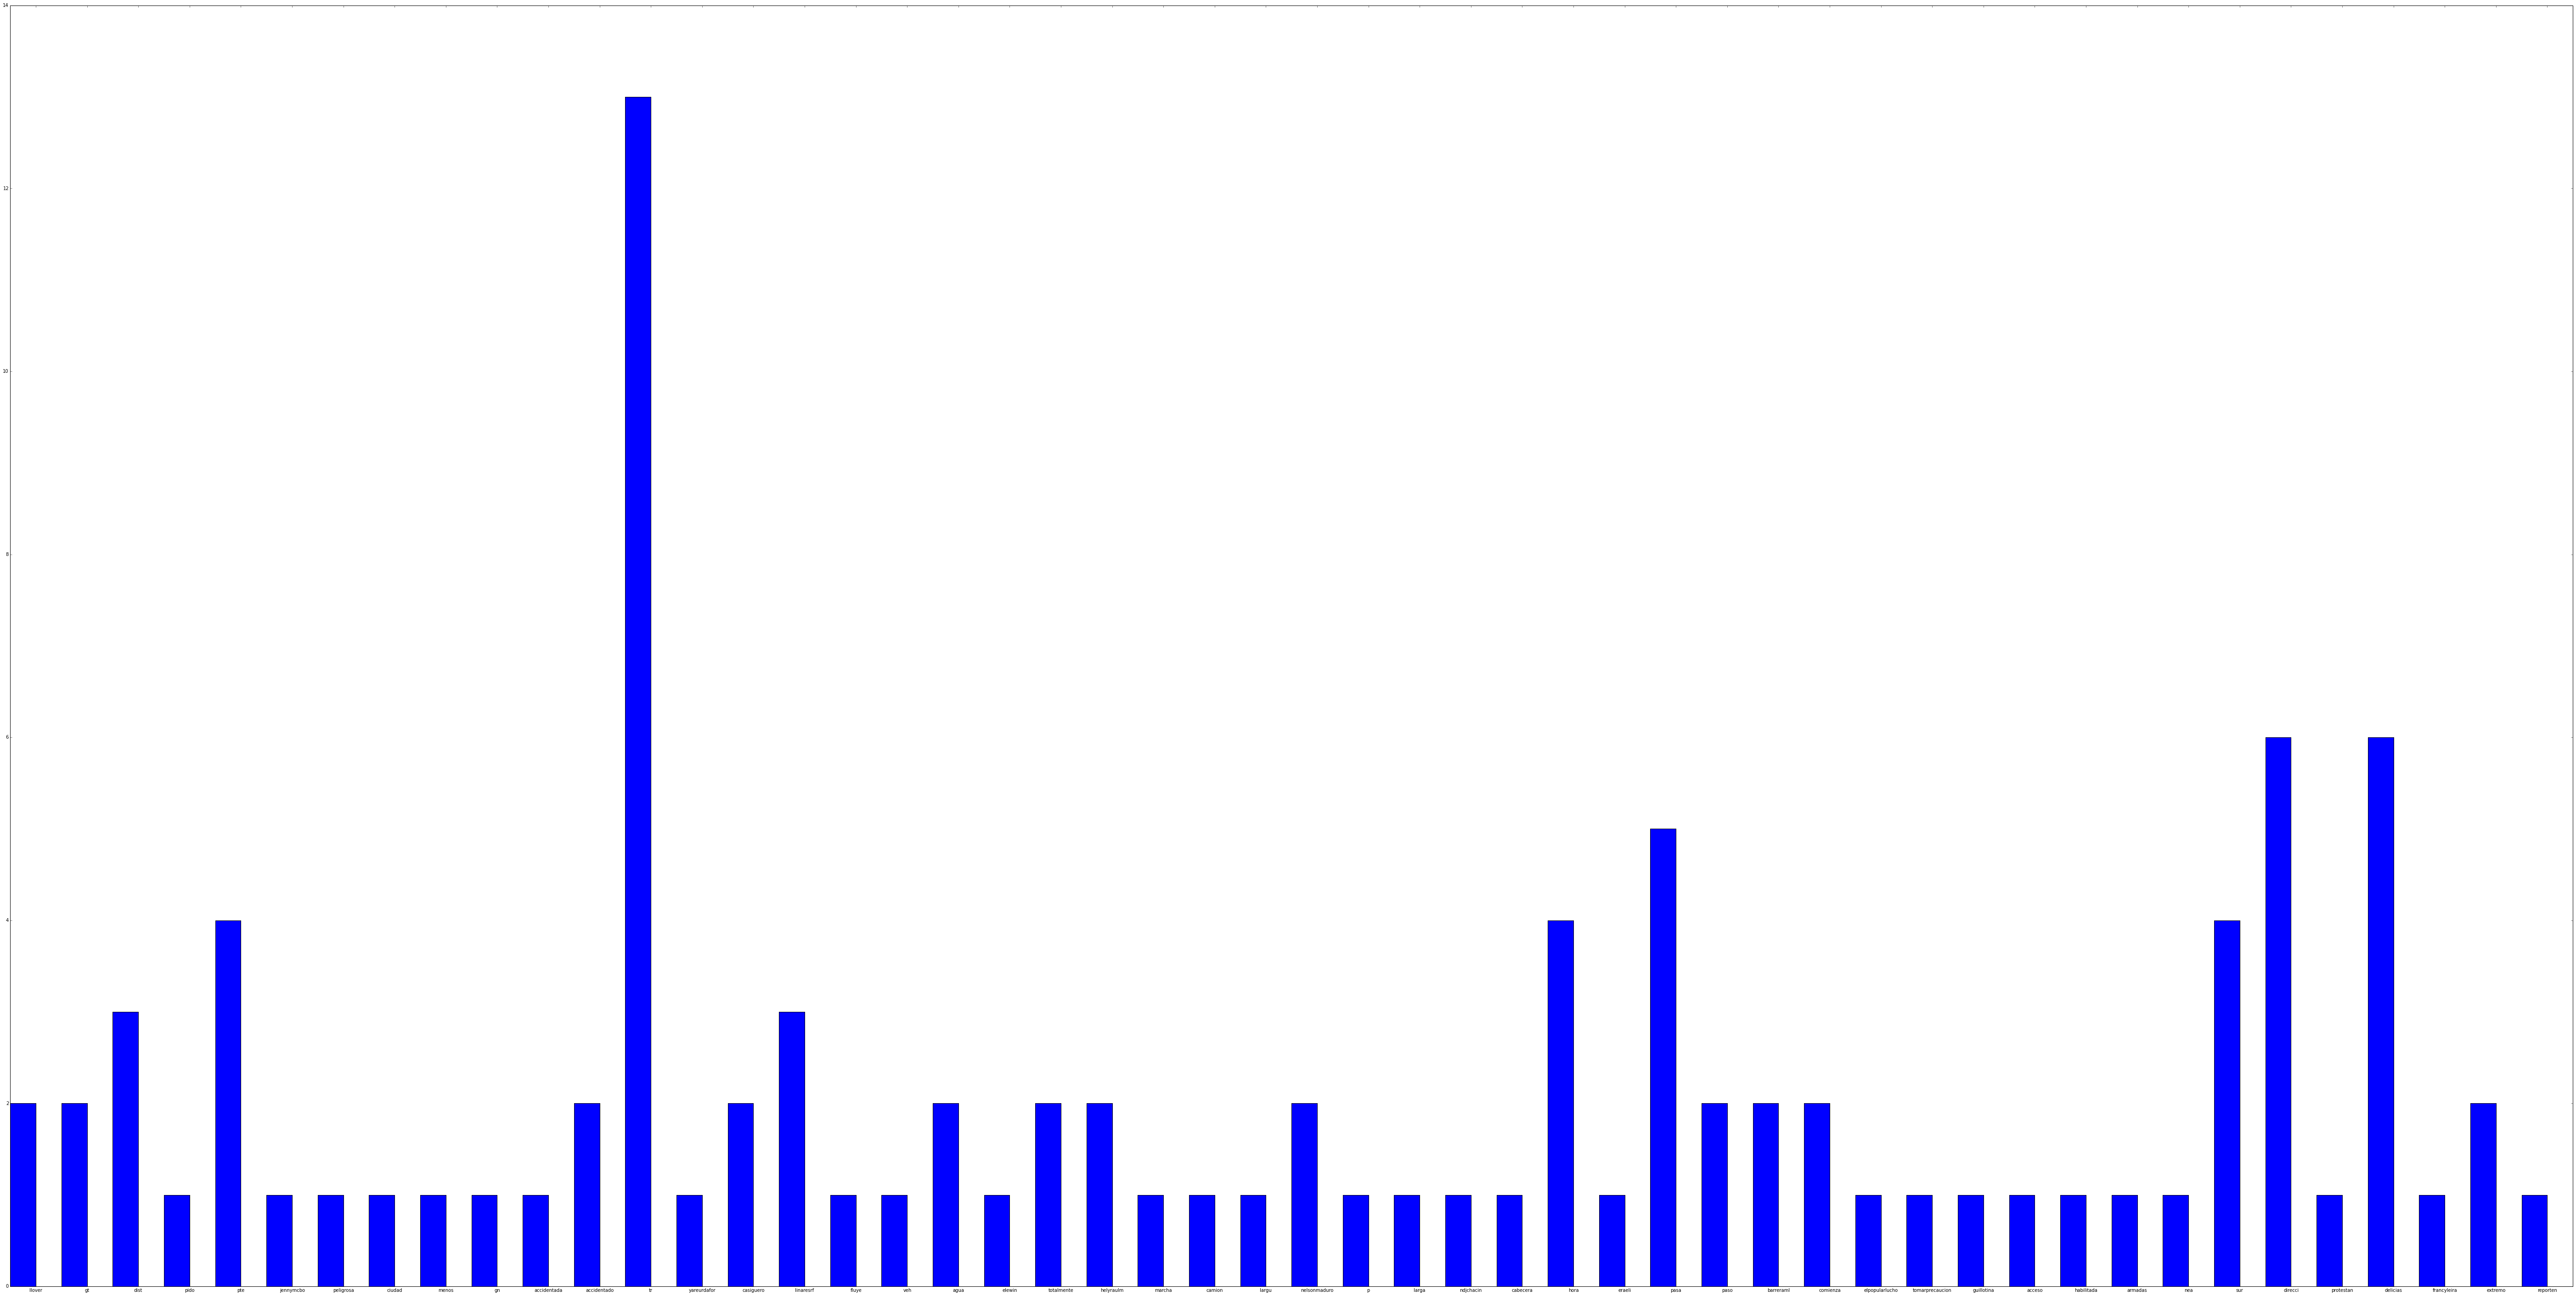

In [84]:
plt.figure(figsize=(100,50))
words = count_words.keys()[0:50]
counts = count_words.values()[0:50]
indexes = np.arange(len(words))
width = 0.5
plt.bar(indexes,counts, width)
plt.xticks(indexes + width , words)
plt.show()